In [4]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.4 MB/s eta 0:00:00 0:00:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv('california_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

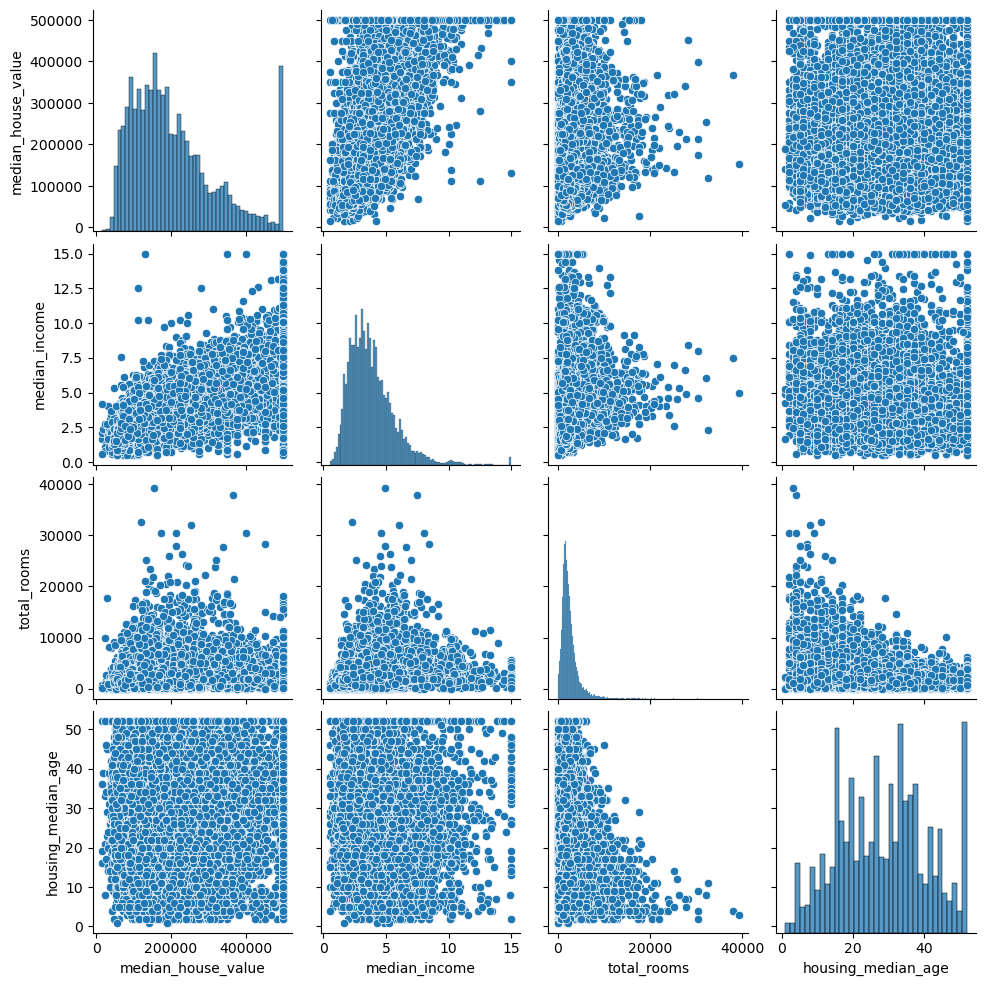

In [14]:
sns.pairplot(df[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])
plt.show()

In [16]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [26]:
X = pd.get_dummies(X)

In [38]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both training and test sets
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Fit model
lr.fit(X_train_imputed, y_train)

# Predict
lr_preds = lr.predict(X_test_imputed)

In [53]:
# Fix column names for XGBoost
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
print(X_test_scaled.shape)

(4128, 13)


In [61]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both training and test sets
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Fit model
lr.fit(X_train_imputed, y_train)

# Predict
lr_preds = lr.predict(X_test_imputed)

In [63]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [66]:
# Clean up column names from invalid characters for XGBoost
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)

# Fit the model again
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [68]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - RMSE: {rmse:.2f}, R2: {r2:.2f}')

evaluate(y_test, lr_preds, 'Linear Regression')
evaluate(y_test, rf_preds, 'Random Forest')
evaluate(y_test, xgb_preds, 'XGBoost')

Linear Regression - RMSE: 70031.49, R2: 0.63
Random Forest - RMSE: 48888.64, R2: 0.82
XGBoost - RMSE: 49730.39, R2: 0.81


In [72]:
best_model = rf

In [74]:
import joblib
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']